# REG Capacity vs. Demand

In [1]:
from wimbledon.vis import DataHandlers

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set() # use seaborn's default formatting

In [2]:
start_date = pd.datetime(2017,4,1)
end_date = pd.datetime(2022,3,31)

#today = pd.datetime(2019,5,22)
today = pd.datetime.now()

resample_freq = 'MS'

### Get Forecast Data

In [3]:
fc = DataHandlers.Forecast()

Enpoint: whoami | Time: 0.016165458999999993 | Cache: True
Enpoint: people/460554 | Time: 0.0022411410000000576 | Cache: True

AUTHENTICATED USER:
Jack Roberts jroberts@turing.ac.uk

CLIENTS
Enpoint: clients | Time: 0.0028315690000000338 | Cache: True
PROJECTS
Enpoint: projects | Time: 0.0018286350000000784 | Cache: True
ROLES
Enpoint: roles | Time: 0.002565082000000052 | Cache: True
PEOPLE
Enpoint: people | Time: 0.0017712149999999927 | Cache: True
PLACEHOLDERS
Enpoint: placeholders | Time: 0.0025143569999999116 | Cache: True
MILESTONES
Enpoint: milestones | Time: 0.0018468179999999723 | Cache: True
ASSIGNMENTS
Enpoint: assignments | Time: 0.002596419000000072 | Cache: True
DONE! (0.1s)


### Demand

In [4]:
# Get totals for REG management, development and support clients
research_support_idx = 745541
reg_management_idx = 745540
reg_dev_idx = 868971

research_support_projs = fc.projects[fc.projects.client_id==research_support_idx].index
reg_management_projs = fc.projects[fc.projects.client_id==reg_management_idx].index
reg_dev_projs = fc.projects[fc.projects.client_id==reg_dev_idx].index

research_support_reqs = fc.project_confirmed[research_support_projs].sum(axis=1)
reg_management_reqs = fc.project_confirmed[reg_management_projs].sum(axis=1)
reg_dev_reqs = fc.project_confirmed[reg_dev_projs].sum(axis=1)

# Get overall totals
project_confirmed = fc.project_confirmed.drop(fc.get_id('UNAVAILABLE','project'), axis=1)
project_confirmed = project_confirmed.sum(axis=1)

project_confirmed = project_confirmed \
                    - reg_management_reqs \
                    - reg_dev_reqs \
                    - research_support_reqs

# Get totals for unconfirmed and deferred projects
unconfirmed = fc.project_unconfirmed.sum(axis=1)
deferred = fc.project_deferred.sum(axis=1)


In [5]:
demand = pd.DataFrame({'REG Management':reg_management_reqs,
                       'REG Development':reg_dev_reqs,
                       'Research Support':research_support_reqs,
                       'Confirmed projects':project_confirmed,
                       'Projects with funder': unconfirmed,
                       'Deferred projects': deferred})

demand = DataHandlers.select_date_range(demand, start_date, end_date, drop_zero_cols=False)

demand = demand.resample(resample_freq).mean()

demand.head()

,REG Management,REG Development,Research Support,Confirmed projects,Projects with funder,Deferred projects
2017-04-01,0.73625,0.00000,0.36875,1.63375,0.0,0.0
2017-05-01,0.73625,0.00000,0.39000,2.23750,0.0,0.0
2017-06-01,0.88125,0.50625,0.43500,2.75625,0.0,0.0
2017-07-01,0.88125,0.50625,0.39000,2.92875,0.0,0.0
2017-08-01,0.88125,0.50625,0.49250,2.99375,0.0,0.0


In [6]:
"""
# FUDGE: force historical demand to match capacity
reqs.loc[pd.datetime(2017,4,1),'Confirmed projects'] = 4.0
reqs.loc[pd.datetime(2017,5,1),'Confirmed projects'] = 4.5
reqs.loc[pd.datetime(2017,6,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,7,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,8,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,9,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,10,1),'Confirmed projects'] = 6
reqs.loc[pd.datetime(2017,11,1),'Confirmed projects'] = 7
reqs.loc[pd.datetime(2017,12,1),'Confirmed projects'] = 8.5
reqs.loc[pd.datetime(2018,1,1),'Confirmed projects'] = 10
reqs.loc[pd.datetime(2018,2,1),'Confirmed projects'] = 10
reqs.loc[pd.datetime(2018,3,1),'Confirmed projects'] = 10
reqs.loc[pd.datetime(2018,4,1),'Confirmed projects'] = 10.5


demand['Confirmed projects'] = demand['Confirmed projects'] \
                               - demand['REG Management'] \
                               - demand['REG Development'] \
                               - demand['Research Support']

demand.head()
"""

"\n# FUDGE: force historical demand to match capacity\nreqs.loc[pd.datetime(2017,4,1),'Confirmed projects'] = 4.0\nreqs.loc[pd.datetime(2017,5,1),'Confirmed projects'] = 4.5\nreqs.loc[pd.datetime(2017,6,1),'Confirmed projects'] = 5.5\nreqs.loc[pd.datetime(2017,7,1),'Confirmed projects'] = 5.5\nreqs.loc[pd.datetime(2017,8,1),'Confirmed projects'] = 5.5\nreqs.loc[pd.datetime(2017,9,1),'Confirmed projects'] = 5.5\nreqs.loc[pd.datetime(2017,10,1),'Confirmed projects'] = 6\nreqs.loc[pd.datetime(2017,11,1),'Confirmed projects'] = 7\nreqs.loc[pd.datetime(2017,12,1),'Confirmed projects'] = 8.5\nreqs.loc[pd.datetime(2018,1,1),'Confirmed projects'] = 10\nreqs.loc[pd.datetime(2018,2,1),'Confirmed projects'] = 10\nreqs.loc[pd.datetime(2018,3,1),'Confirmed projects'] = 10\nreqs.loc[pd.datetime(2018,4,1),'Confirmed projects'] = 10.5\n\n\ndemand['Confirmed projects'] = demand['Confirmed projects']                                - demand['REG Management']                                - demand['REG D

### Capacity

In [7]:
ftc = fc.people[fc.people['association_group']=='REG FTC'].index

assoc = fc.people[fc.people['association_group']=='REG Associate'].index

select_perm = pd.DataFrame(index=fc.people.index)
select_perm['perm'] = fc.people['association_group']=='REG Permanent' 
select_perm['senior'] = fc.people['association_group']=='REG Senior'
select_perm['princ'] = fc.people['association_group']=='REG Principal'
select_perm['direc'] = fc.people['association_group']=='REG Director'
select_perm = select_perm.any(axis=1)

perm = fc.people[select_perm].index

fc.capacity[ftc].sum(axis=1)

capacity = pd.DataFrame(index=fc.capacity.index)
capacity['REG FTC'] = fc.capacity[ftc].sum(axis=1)
capacity['REG Associate'] = fc.capacity[assoc].sum(axis=1)
capacity['REG Permanent'] = fc.capacity[perm].sum(axis=1)

capacity = capacity.resample(resample_freq).mean()

capacity = DataHandlers.select_date_range(capacity, start_date, end_date)
capacity.head(10)

,REG FTC,REG Associate,REG Permanent
2017-04-01,0.0,0.0,4.00000
2017-05-01,0.0,0.0,4.50000
2017-06-01,0.0,0.0,5.50000
2017-07-01,0.0,0.0,5.50000
2017-08-01,0.0,0.0,5.50000
2017-09-01,0.0,0.0,5.50000
2017-10-01,0.0,0.0,6.00000
2017-11-01,0.0,0.0,8.00000
2017-12-01,0.0,0.0,8.50000
2018-01-01,0.0,0.0,10.19625


In [8]:
# Load capacity data exported from previous spreadsheet planner
# Only used for university partners - others should be correct in Forecast
csv = pd.read_csv('../data/reg_capacity.csv', index_col='Month')
csv = csv.T
csv.index = pd.to_datetime(csv.index, format='%b-%y')
csv = csv.loc[start_date:end_date]

capacity['University Partner'] = csv['University Partner capacity']

In [9]:
# order columns
capacity = capacity[['REG Permanent', 
                     'REG FTC', 
                     'University Partner', 
                     'REG Associate']]


### Plot

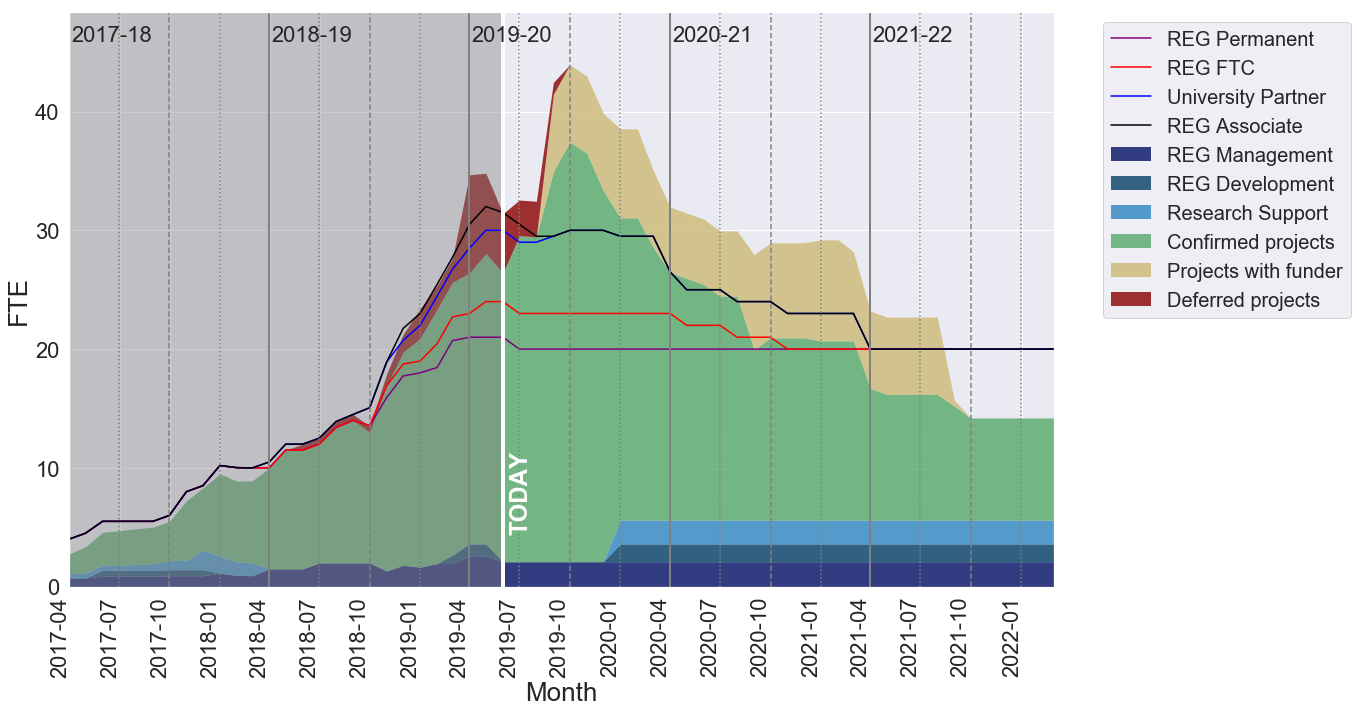

In [45]:
fig = plt.figure(figsize=(19, 10))
ax = fig.gca()

demand.plot.area(ax=ax, x_compat=True, rot=90, alpha=0.8, 
                  color=['#041165','#043E65','#2E86C1','g','y','darkred'], 
                  stacked=True, linewidth=0)

capacity.cumsum(axis=1).plot(ax=ax, rot=90,
                             linewidth=1.5, 
                             color=['purple','red','blue','black'])

# axis limits
xlim = ax.get_xlim()
ylim = (0, 
        1.1*max([capacity.sum(axis=1).max(), demand.sum(axis=1).max()]))

# add quarter separators
quarters = pd.date_range(start=demand.index.min(),end=demand.index.max(),freq='QS')
for q in quarters:
    if q.month==4:
        linestyle = '-'
        linewidth = '2'
        
        # Annotate year (Q1) starts
        ax.text(x = q+pd.Timedelta('4 days'), 
                y = ylim[1]*0.95, 
                s = str(q.year)+'-'+str(q.year+1)[-2:], 
                rotation=0, 
                fontsize=22)
    
    elif q.month==7:
        linestyle = ':'
        linewidth = '1.5'        
    
    elif q.month==10:
        linestyle = '--'
        linewidth = '1.5'        
    
    elif q.month==1:
        linestyle = ':'
        linewidth = '1.5'
    
    ax.plot([q, q], ylim, linestyle=linestyle, linewidth=linewidth, color='grey')
    
# format labels and titles
ax.set_xticks(demand.resample('BQS').mean().index.values)
ax.set_xticklabels(demand.resample('BQS').mean().index.strftime("%Y-%m").values, fontsize=22)
plt.yticks(fontsize=22)

ax.set_ylabel('FTE', fontsize=26)
ax.set_xlabel('Month', fontsize=26)

# legend outside plot
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=20)

# reset axis limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Annotate "today" (today defined in first cell)
ax.plot([today, today], ylim, color='white',linewidth=4)

ax.text(today+pd.Timedelta(12,unit='D'), 10, 'TODAY', 
        rotation=90, fontsize=24, color='white', fontweight='bold')

# grey box over the past
ax.fill([start_date, today, today, start_date],
        [ylim[0], ylim[0], ylim[1], ylim[1]],
        'grey', alpha=0.4)

# save figure
plt.tight_layout()
plt.savefig('../data/figs/demand_vs_capacity.png',dpi=300)

### Table

In [52]:
project_ids = fc.project_confirmed.copy().columns
clients=[]
for project in project_ids:
    client_id = fc.projects.loc[project, 'client_id']
    
    if not np.isnan(client_id) and \
       not fc.clients.loc[client_id,'name']=='UNAVAILABLE':
        
        clients.append(fc.clients.loc[client_id,'name'])
    
    else:
        clients.append('NaN')
    

client_meanfte = fc.project_confirmed.copy()
client_meanfte = client_meanfte.groupby(clients,axis=1).sum()
client_meanfte = client_meanfte.resample('AS-APR').mean()

client_meanfte = client_meanfte.loc[:, client_meanfte.sum()>0]

client_meanfte = client_meanfte.T
client_meanfte.drop('NaN', inplace=True)

client_meanfte.to_csv('../data/figs/demand_per_client.csv')

client_meanfte

,2016-04-01 00:00:00,2017-04-01 00:00:00,2018-04-01 00:00:00,2019-04-01 00:00:00,2020-04-01 00:00:00,2021-04-01 00:00:00
Data science at scale,0.0,0.204233,0.860672,0.000000,0.000000,0.000000
Data science for science and the humanities,0.0,0.000000,1.290810,3.030118,3.100000,2.600000
Data-centric engineering,0.0,0.817888,2.616008,4.494094,3.401186,0.498024
Defence and security,0.0,1.713317,3.176877,3.676772,2.000000,2.000000
External,0.0,0.018581,0.000000,0.000000,0.000000,0.000000
Finance and economics,0.0,0.052928,0.299407,0.334646,0.000000,0.000000
Health,0.0,0.358526,0.908498,2.539862,1.241107,0.411067
Public Policy,0.0,0.114980,0.381225,0.921260,1.000000,1.000000
REG Development Work,0.0,0.300523,0.059289,0.539370,1.500000,1.500000
REG Management,0.0,0.901111,1.764032,2.180709,2.100000,2.100000


## TODO
### High priority
1. Missing demand for 2017-18 (some from missing data in Forecast, some from April 2017 being dropped by `resample`)
  1. Due to "hut23_actual_effort" spreadsheet not adding up for all people for all months. Plot currently forces capacity to match demand in 2017-18. Should be fixed in Forecast.
1. **Demand / Capacity mismatch 2018-19**
  1. Mostly fixed by cross-checking spreadsheet and Forecast.
1. Capacity lines need extended to April 2022
  1. Done.
1. Can we do a cumulative sum for all capacity except Total to get lines to match original plot?
  1. Done
1. Can we add year labels to mark clearly the span of each financial year.
  1. Done.
1. **Can we be confident 40 FTE is expected long run average? Perhaps x-FTE per programme (based on current less TF demand) + x-FTE per partner uni (support + TF demand + proj-specific demand)**

### Medium priority
1. Missing unconfirmed demand compared to spreadsheet
  1. Done.
1. **Add Scottish Enterprise demand back in time**
1. **Extend Third-party and Edinburgh Safe Haven capacity if demand is solid (check with JH). Should this be TPS or Hut23 project? If Hut23 move REG demand from June to this project.**
1. **Add AI programme demand?**
1. Can we clearly mark 22 May (or 01 June if closest date that's easy to do) as "today" and add a cisual cue to spearate past from future (perhaps a white box over the past or future with alpha to "fade" it)?
  1. Done.

### Low priority
1. Can we separate Hut23 + Research support demand from confirmed and show as "baseline" in another colour below the remaining green confirmed demand (blue perhaps)?
  1. Done
1. Fix duplicate projects in Harvest
1. Split client table by funder.
